In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime

import ConstructPortfolio as cp #this will allow us to modularize the code!
#using "ConstructPortfolio.py" that is stored in the same directory! 
#(not using "ConstructPortfolio.ipynb")


/Users/bardiafarajnejad/Desktop/1st Half MFE/AFP/Final Delivery/MFE Group 16 AFP Code


# Very informative to trade on sector moves the longer you hold it; should hold for at least 15 days to see lots of profits (sector non-moves is in "sell" days but please ignore this "sell" event as it encompasses all days when sector stays the same...

# When we combine this event with volume spikes, the # of occurance goes down dramatically to below 500 events, but a similar results holds as above



In [2]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl')
data.columns.values

array(['tradedate', 'osid', 'symbol', 'coname', 'sector_group', 'max_dt',
       'previoustradedate', 'tickssinceipo', 'alpha', 'stdev_alpha',
       'pricehigh', 'pricelow', 'priceclose', 'priceopen', 'splitfactor',
       'cumsplitfactor', 'volume', 'unadjustedpriceclose', 'pricepctchgd',
       'avgvol50d', 'avgdollarvol50d', 'growthscore', 'growthrank',
       'lastupdatetime', 'epsq1', 'epsq2', 'epsq3', 'epsq4', 'epsq5',
       'epsq6', 'epsq7', 'epsq8', 'epshighq1', 'epshighq2', 'epshighq3',
       'epshighq4', 'epshighq5', 'epshighq6', 'epshighq7', 'epshighq8',
       'epslowq1', 'epslowq2', 'epslowq3', 'epslowq4', 'epslowq5',
       'epslowq6', 'epslowq7', 'epslowq8', 'salesq1', 'salesq2',
       'salesq3', 'salesq4', 'salesq5', 'salesq6', 'salesq7', 'salesq8',
       'saleshighq1', 'saleshighq2', 'saleshighq3', 'saleshighq4',
       'saleshighq5', 'saleshighq6', 'saleshighq7', 'saleshighq8',
       'saleslowq1', 'saleslowq2', 'saleslowq3', 'saleslowq4',
       'saleslowq5', 's

# sector_group

### Now, let's trade on when sector group changes
### the times when 'sector_group' changes
###### Buy when change, so when df['sector_group'].diff(1) != 0
###### Sell when no change, so when df['sector_group'].diff(1) == 0
### with 1 day, 1 week, 2 weeks, 3 weeks, and 4 weeks holding period 
### (AHEAD, not backward... so our ret, ret5d, 10d, 15d, and 20d needs to be forward)
### Thus, we will use ret5d_'lag' !!

# Set buy_tomorrow>0 when df['sector_group'].diff(1) != 0
# Set Sell_tomorrow>0 when df['sector_group'].diff(1) == 0


In [3]:
data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['sector_group'].notna()].reset_index(drop=True).copy() #drop na values

data['buy_tomorrow'] = np.where(data['sector_group'].diff(1) != 0, 1, 0)
data['sell_tomorrow'] = np.where(data['sector_group'].diff(1) == 0, 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'


Total number of Buys:  1077
Total number of Sells:  2797333
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]


In [4]:
data = cp.trade_on_valid_lags_only(data)


There are  2  problems for buying

There are  570  problems for selling
Total number of Buys:  1075
Total number of Sells:  2796763


# Now we can trade!
### Holding period of 1 week, 2 weeks, 3 weeks, and 4 weeks with equal weighted portfolios!

# First, create daily equal weighted portfolio weights and returns (NOT AT THE WEEKLY frequency because that will mess up the implementation of the portfolio!). Problem is:

##### Think (part 1): 1st signal on Monday- want to buy on Tuesday and hold for 1 week in an equal weighted portfolio
##### Think (part 2): 2nd signal on Thursday- want to buy on Friday and hold for 1 week in an equal weighted portfolio
##### Think (part 3): Will have overlapping portfolio between 1st and 2nd signal on Friday and on Monday

## Then, for 1 week, 2 week, 3 week, and 4 week holding periods, we must do the following:
##### extend "buy_tomorrow" and "sell_tomorrow" forward for 4 more trading days

In [5]:
data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)


There are  5  problems for buying

There are  564  problems for selling
Total number of Buys:  15968
Total number of Sells:  2794765

There are  5  problems for buying

There are  564  problems for selling
Total number of Buys:  12284
Total number of Sells:  2794765

There are  4  problems for buying

There are  564  problems for selling
Total number of Buys:  8394
Total number of Sells:  2794765

There are  3  problems for buying

There are  564  problems for selling
Total number of Buys:  4336
Total number of Sells:  2794765

There are  0  problems for buying

There are  98  problems for selling
Total number of Buys:  958
Total number of Sells:  2794545


# First, do 1 day holding period: data_smaller
# Next, do 5 day holding period: data_smaller5
# Next, do 10 day holding period: data_smaller10
# Next, do 15 day holding period: data_smaller15
# Next, do 20 day holding period: data_smaller20



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5249
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.789
Time:                        18:24:58   Log-Likelihood:                 655.72
No. Observations:                 430   AIC:                            -1297.
Df Residuals:                     423   BIC: 

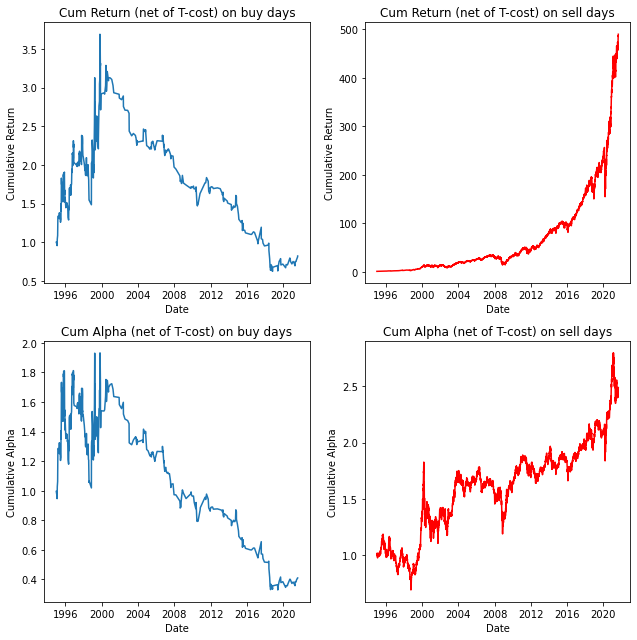

In [6]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.794
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0967
Time:                        18:27:12   Log-Likelihood:                 2710.3
No. Observations:                1566   AIC:                            -5407.
Df Residuals:                    1559   BIC: 

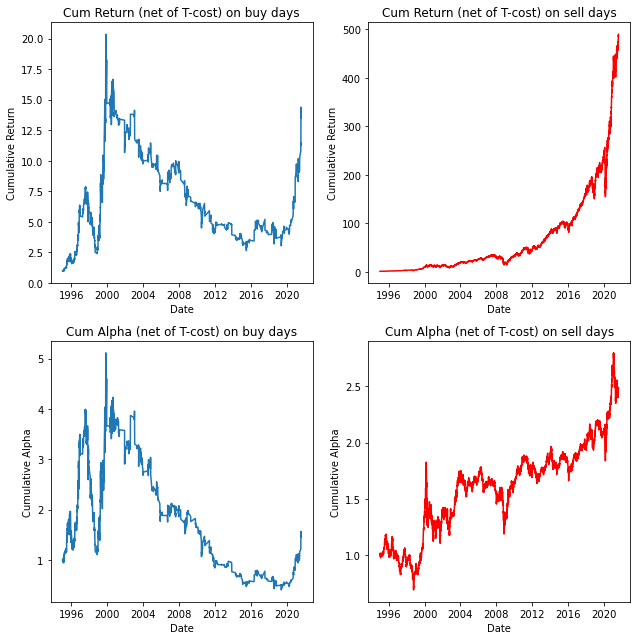

In [7]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.371
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000213
Time:                        18:29:25   Log-Likelihood:                 4486.6
No. Observations:                2459   AIC:                            -8959.
Df Residuals:                    2452   BIC: 

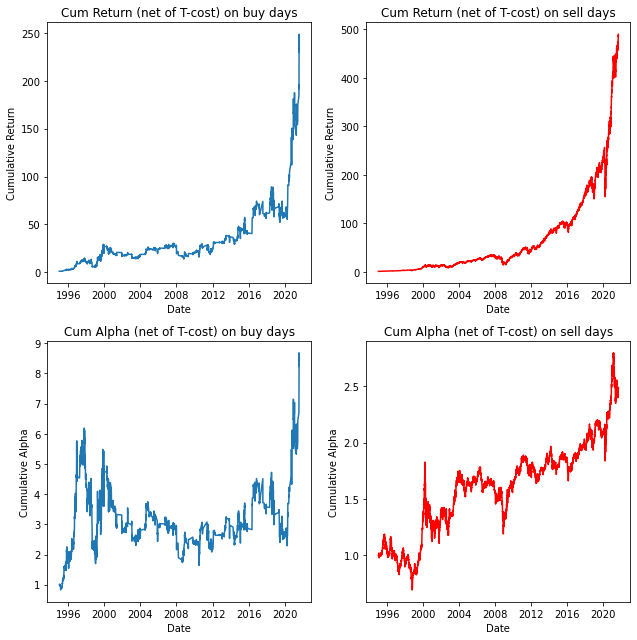

In [8]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     5.252
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           2.15e-05
Time:                        18:31:30   Log-Likelihood:                 5760.1
No. Observations:                3082   AIC:                        -1.151e+04
Df Residuals:                    3075   BIC: 

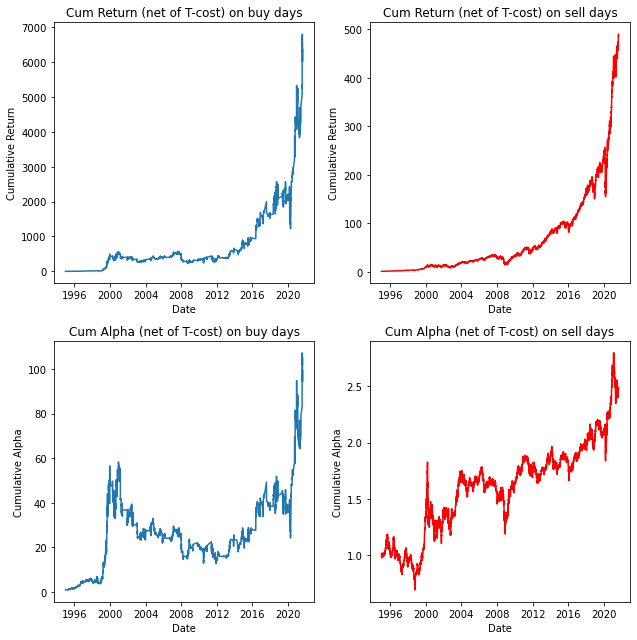

In [9]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     4.214
Date:                Sat, 04 Dec 2021   Prob (F-statistic):           0.000312
Time:                        18:33:43   Log-Likelihood:                 6770.3
No. Observations:                3537   AIC:                        -1.353e+04
Df Residuals:                    3530   BIC: 

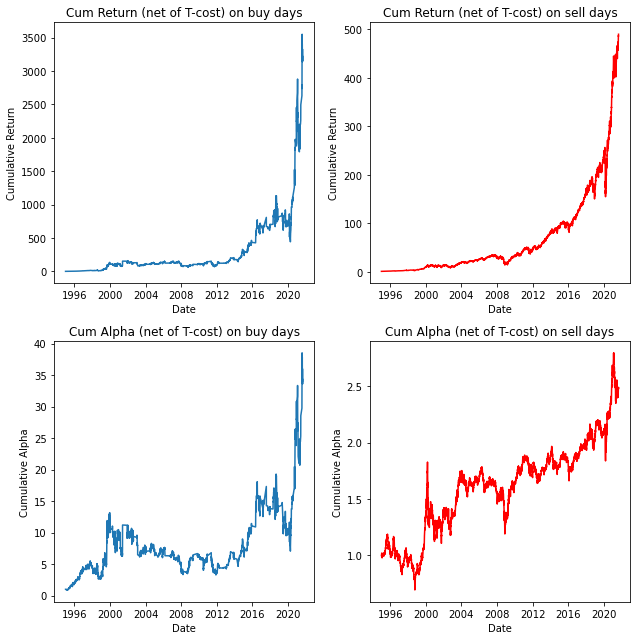

In [10]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# BREAK!
# BREAK!
# BREAK!

# Now, let's do the same thing but COMBINING THE EVENT WITH VOLUME SPIKES!

# Set buy_tomorrow>0 when df['sector_group'].diff(1) != 0 AND vol spikes above the 50_day_avgVol
# Set Sell_tomorrow>0 when df['sector_group'].diff(1) == 0 AND vol falls below the 50_day_avgVol


In [11]:
#### Please run the line below once in order to get "data_with_rets.pkl" from "afp_data_sample_1995_onward_v2.csv"
#cp.get_data(flag=True)

data = pd.read_pickle('data_with_rets.pkl') #reload the data in order to start from scratch!!!

data = data.sort_values(['osid', 'tradedate']).reset_index(drop=True).copy()

data = data[data['sector_group'].notna()].reset_index(drop=True).copy() #drop na values
data = data.loc[data['volume'].notna(),:].reset_index(drop=True).copy()
data = data.loc[data['avgvol50d'].notna(),:].reset_index(drop=True).copy()


data['buy_tomorrow'] = np.where((data['sector_group'].diff(1) != 0) & (data['volume']>data['avgvol50d']), 1, 0)
data['sell_tomorrow'] = np.where((data['sector_group'].diff(1) == 0) & (data['volume']<data['avgvol50d']), 1, 0)


print('Total number of Buys: ',np.count_nonzero(data['buy_tomorrow']))
print('Total number of Sells: ',np.count_nonzero(data['sell_tomorrow']))

print('Unique buy_tomorrow values: ',np.unique(data['buy_tomorrow'])) #there are only 0 or 1 values in 'buy_tomorrow'
print('Unique sell_tomorrow values: ',np.unique(data['sell_tomorrow'])) #there are only 0 or 1 values in 'sell_tomorrow'



data = cp.trade_on_valid_lags_only(data)

data_smaller,data_smaller5,data_smaller10,data_smaller15,data_smaller20 = cp.pull_signal_forward(data)

data_smaller20 = cp.trade_on_valid_lags_only(data_smaller20)
data_smaller15 = cp.trade_on_valid_lags_only(data_smaller15)
data_smaller10 = cp.trade_on_valid_lags_only(data_smaller10)
data_smaller5 = cp.trade_on_valid_lags_only(data_smaller5)
data_smaller = cp.trade_on_valid_lags_only(data_smaller)

Total number of Buys:  303
Total number of Sells:  1775209
Unique buy_tomorrow values:  [0 1]
Unique sell_tomorrow values:  [0 1]

There are  0  problems for buying

There are  344  problems for selling
Total number of Buys:  303
Total number of Sells:  1774865

There are  4  problems for buying

There are  562  problems for selling
Total number of Buys:  4835
Total number of Sells:  2790147

There are  4  problems for buying

There are  561  problems for selling
Total number of Buys:  3698
Total number of Sells:  2782880

There are  4  problems for buying

There are  560  problems for selling
Total number of Buys:  2509
Total number of Sells:  2753806

There are  3  problems for buying

There are  516  problems for selling
Total number of Buys:  1278
Total number of Sells:  2608936

There are  0  problems for buying

There are  45  problems for selling
Total number of Buys:  273
Total number of Sells:  1773386



There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  2  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.4690
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.830
Time:                        18:39:12   Log-Likelihood:                 189.81
No. Observations:                 103   AIC:                            -365.6
Df Residuals:                      96   BIC: 

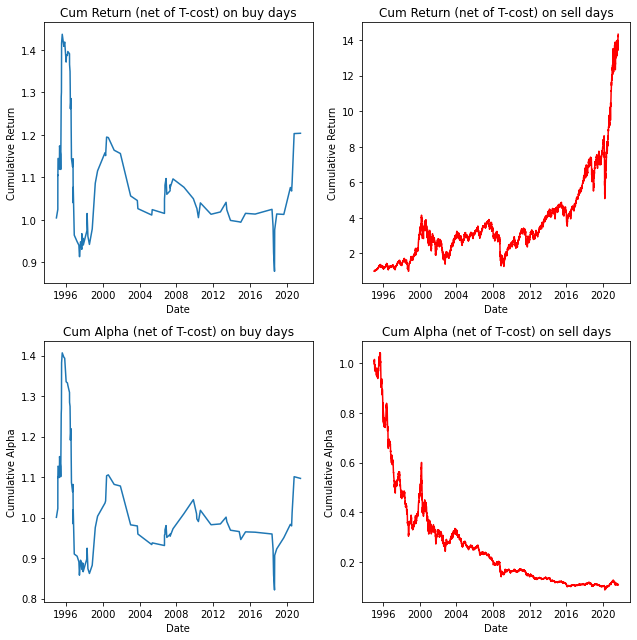

In [12]:
# 1 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.5102
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.801
Time:                        18:40:16   Log-Likelihood:                 799.12
No. Observations:                 438   AIC:                            -1584.
Df Residuals:                     431   BIC: 

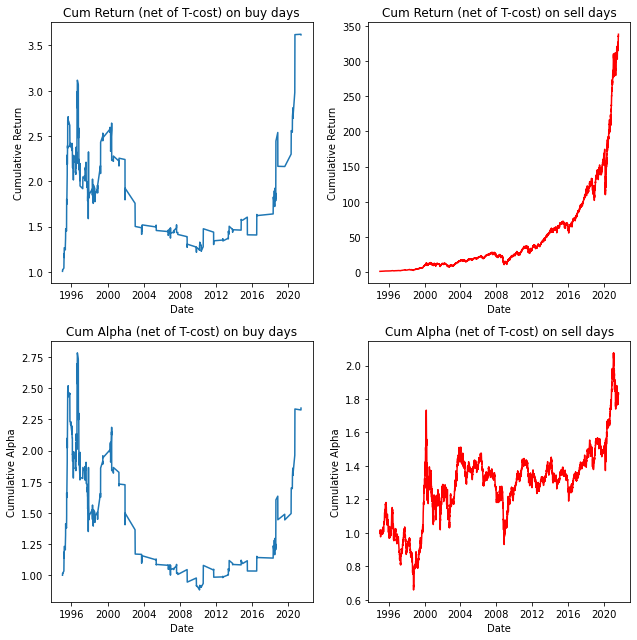

In [13]:
# 5 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller5)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.850
Date:                Sat, 04 Dec 2021   Prob (F-statistic):             0.0869
Time:                        18:41:24   Log-Likelihood:                 1401.4
No. Observations:                 785   AIC:                            -2789.
Df Residuals:                     778   BIC: 

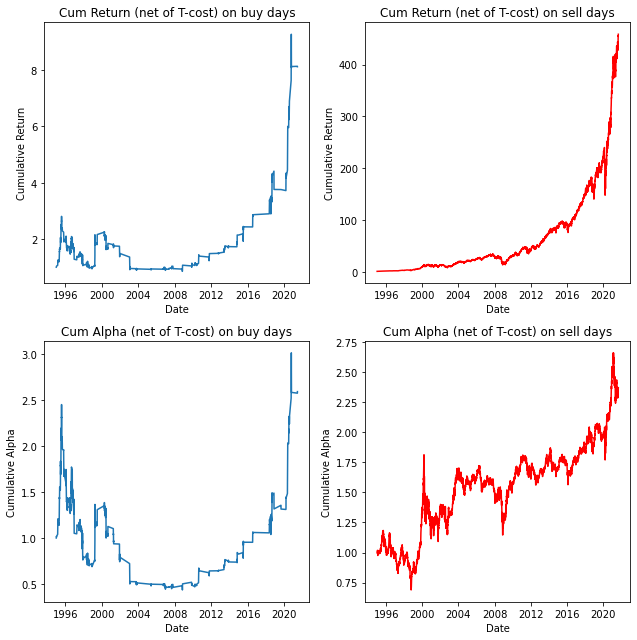

In [14]:
# 10 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller10)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  1  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     3.126
Date:                Sat, 04 Dec 2021   Prob (F-statistic):            0.00484
Time:                        18:42:32   Log-Likelihood:                 1946.0
No. Observations:                1075   AIC:                            -3878.
Df Residuals:                    1068   BIC: 

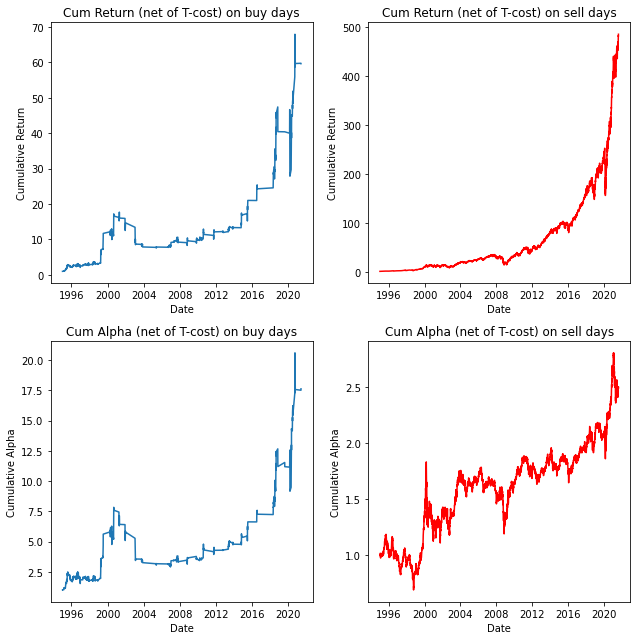

In [15]:
# 15 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller15)


There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

There are  0  returns that dont match using .mean() vs. using equal weights

There are  0  alphas that dont match using .mean() vs. using equal weights

All weights sum to one for Buys

All weights sum to one for Sells
Regression for Buy Portfolio
                            OLS Regression Results                            
Dep. Variable:           ew_return-RF   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.642
Date:                Sat, 04 Dec 2021   Prob (F-statistic):              0.132
Time:                        18:43:40   Log-Likelihood:                 2414.4
No. Observations:                1330   AIC:                            -4815.
Df Residuals:                    1323   BIC: 

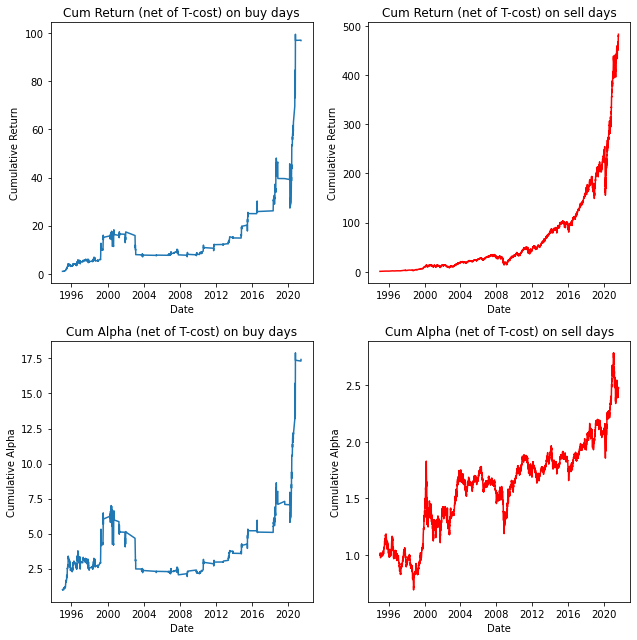

In [16]:
# 20 day holding period
cp.get_returns_turnover_Tcost_summary_plusPlots(data_smaller20)

# Takeaway:
### Combining with Volume made the sector change signal weaker!